
# DATA COLLECTION



In [71]:
# IMPORTING NECESSARY MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score,accuracy_score,confusion_matrix,log_loss,classification_report

%matplotlib inline

In [72]:
# READING THE DATA FROM CSV FILE
data=pd.read_csv('datasets_19_420_iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
# KNOWING THE SIZE OF THE OBTAINED DATA
data.shape

(150, 6)

# DATA ANALYSIS

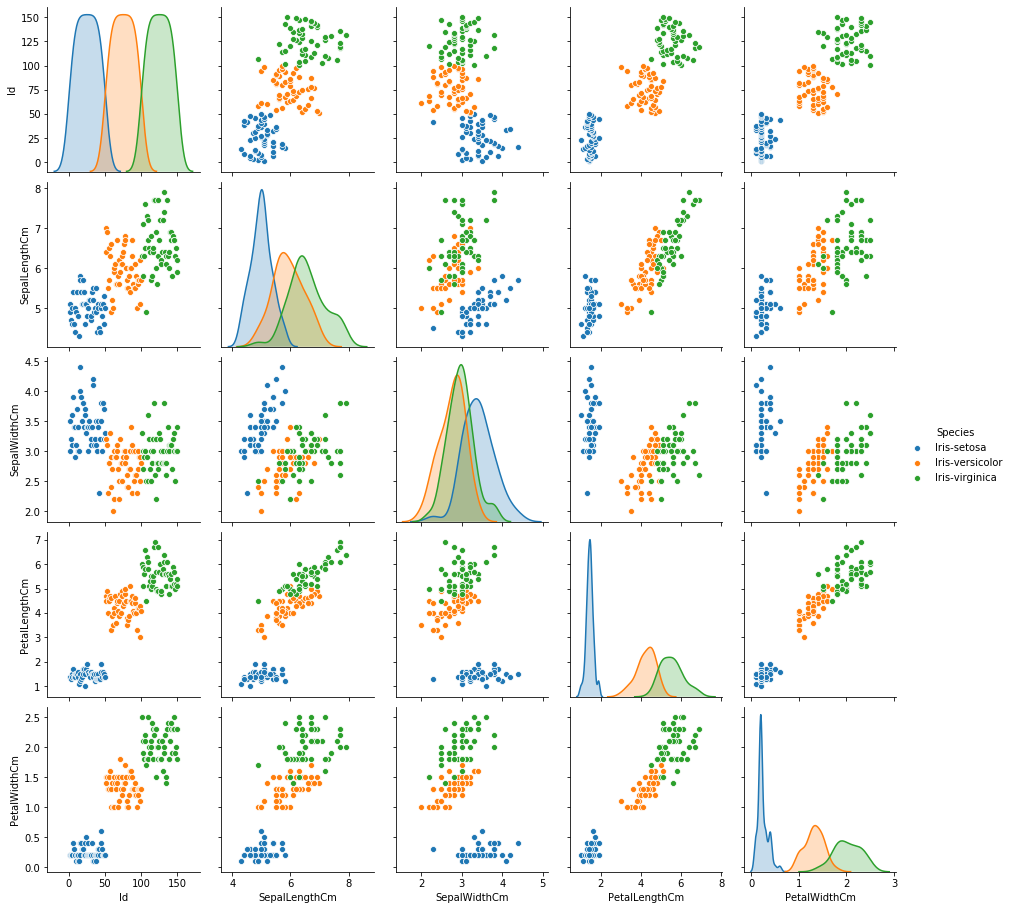

In [43]:
# VISUALIZING THE DATA FOR ANALYSING THE PATTERNS
sb.pairplot(data,hue='Species')

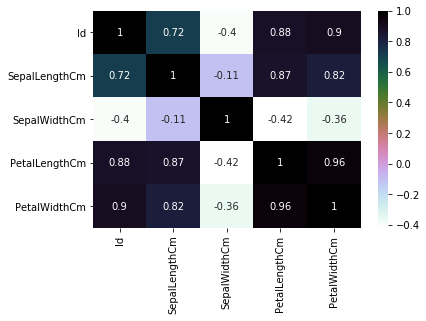

In [23]:
# ANALYSING THE CORRELATION BETW DIFFERENT COMNINATIONS OF FEATURES
sb.heatmap(data.corr(),cmap='cubehelix_r',annot=True)

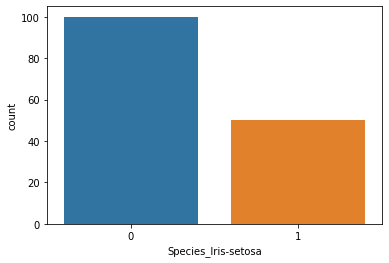

In [74]:
# ANALYSING HOW MANY TIMES GIVES SPECIES IS REPEATED IN TRAINING SET
cols=['Species']
new_data=pd.get_dummies(data,cols)
sb.countplot(x='Species_Iris-setosa',data=new_data)


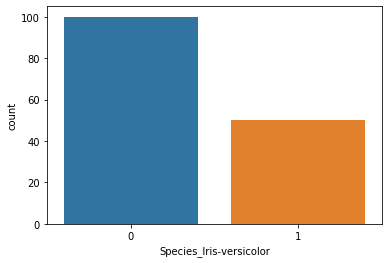

In [75]:
# ANALYSING HOW MANY TIMES GIVES SPECIES IS REPEATED IN TRAINING SET
sb.countplot(x='Species_Iris-versicolor',data=new_data)

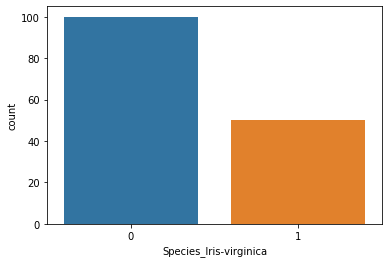

In [76]:
# ANALYSING HOW MANY TIMES GIVES SPECIES IS REPEATED IN TRAINING SET
sb.countplot(x='Species_Iris-virginica',data=new_data)

In [77]:
# ANALYSING THE DATA
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [78]:
# DESCRIBING THE DATA
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# DATA WRANGLING

In [79]:
# CHECK ANY NAN VALUE PRESENT IN THE DATA
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [80]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


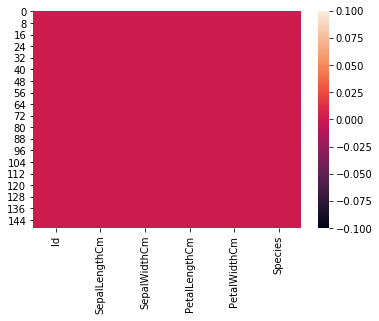

In [81]:
# HEAT MAPS TO CHECK PRESENCE OF MISSING OR NAN VALUES IN THE TRAINING SET
sb.heatmap(data.isnull())

In [82]:
# REPLACING THE STRING COLUMN WITH DUMMY VALUES 
cols=['Species']
new_data=pd.get_dummies(data,cols)
new_data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,1,0,0
1,2,4.9,3.0,1.4,0.2,1,0,0
2,3,4.7,3.2,1.3,0.2,1,0,0
3,4,4.6,3.1,1.5,0.2,1,0,0
4,5,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,0,0,1
146,147,6.3,2.5,5.0,1.9,0,0,1
147,148,6.5,3.0,5.2,2.0,0,0,1
148,149,6.2,3.4,5.4,2.3,0,0,1


In [83]:
# TO MERGE MULTIPLE BINARY CLOUMNS
r,c=data.shape
my_data=np.array(new_data[['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica']])
my_list=[]
a1=a2=a3=0
for i in range(r):
    val1=my_data[i][0]
    val2=my_data[i][1]
    val3=my_data[i][2]
    if (val1==1 and val2==0 and val3==0):
        my_list.append(1)
    if (val1==0 and val2==1 and val3==0):
        my_list.append(2)
    if (val1==0 and val2==0 and val3==1):
        my_list.append(3)
    

my_y=np.asanyarray(my_list).reshape(150,1)

# TRAIN AND TEST

In [84]:
# CONVERTING THE DATA INTO MATRIX FORM
new_data1=new_data.drop(columns=['Id','Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica','SepalLengthCm','SepalWidthCm'])
x=np.asanyarray(new_data1)
my_y=np.asanyarray(my_list).reshape(150,1)
new_data1.head(3)


,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [85]:
# SPLIT THE DATA TO TARIN AND TEST SET
x_train, x_test, y_train, y_test = train_test_split(x,my_y, test_size=0.2, random_state=0)
y_train=y_train.flatten()
print(y_train)

[3 2 1 3 3 2 1 2 2 2 3 1 3 1 1 2 3 3 3 3 2 3 2 2 3 3 3 3 2 3 2 1 3 2 2 2 2
 3 1 1 3 2 1 1 2 1 3 2 1 2 3 2 1 3 3 3 3 1 1 3 3 1 3 1 3 3 1 1 3 1 1 1 2 3
 3 1 1 1 2 2 1 1 2 1 3 2 3 2 1 3 1 3 1 1 3 1 3 2 2 2 3 3 2 2 1 2 3 3 1 2 2
 2 2 1 1 1 3 2 3 1]


In [86]:
# LEARNING ALGORITHM i.e. KNN ALGORITHM
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
predict=knn.predict(x_test)
acc=knn.score(x_test,y_test)*100
print(acc,predict,sep='\n')


100.0
[3 2 1 3 1 3 1 2 2 2 3 2 2 2 2 1 2 2 1 1 3 2 1 1 3 1 1 2 2 1]


# EVALUATION

In [87]:
# JACCARD INDEX
jaccard_similarity_score(y_test,predict)

C:\python_spy\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


1.0

In [88]:
# CHECK THE ACCURACY
accuracy_score(y_test,predict)*100

100.0

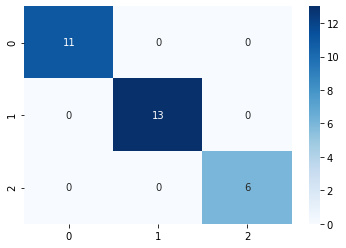

In [89]:
# CONFUSION MATRIX 
cm=confusion_matrix(y_test,predict)
sb.heatmap(cm,cmap='Blues',annot=True)

In [90]:
#PREDICITON OF ANY GIVEN DATA
print( 'PetalLengthCm'  ,  'PetalWidthCm'  )
a,b=[float(i) for i in input().split()]
res=knn.predict([[a,b]])
if res==1:
    print('Predicted Flower Is:','Species_Iris-setosa')
elif res==2:
    print('Predicted Flower Is:','Species_Iris-versicolor')
elif res==3:
    print('Predicted Flower Is:','Species_Iris-virginica')



PetalLengthCm PetalWidthCm


 1.2 9.1


Predicted Flower Is: Species_Iris-virginica


Text(0.5, 1.0, 'FINDING BEST VALUE FOR K')

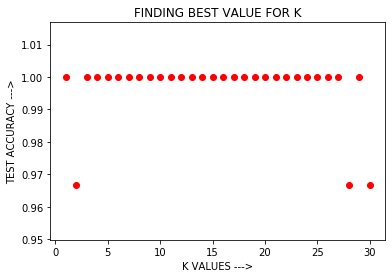

In [91]:
# TO SELECT THE BEST VALUE OF K IN K-NN { ACCURACY VS K VALUE }
p=list(range(1,31))
lst=[]
for i in p:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    z=knn.score(x_test,y_test)
    lst.append(z)
    
plt.scatter(p,lst,color='red')
plt.xlabel('K VALUES --->')
plt.ylabel('TEST ACCURACY --->')
plt.title('FINDING BEST VALUE FOR K')


Text(0.5, 1.0, 'SELECTING BEST VALUE OF TRAIN PROPORTION')

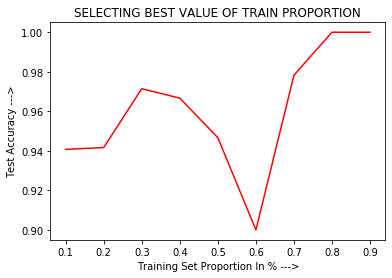

In [92]:
# TO SELECT THE BEST VALUE FOR TRAINING PROPORTION
t=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lst1=[]
for i in t:
    X_train, X_test, Y_train, Y_test = train_test_split(x,my_y, test_size=(1-i), random_state=0)
    Y_train=Y_train.flatten()
    knn=KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train,Y_train)
    l=acc=knn.score(X_test,Y_test)
    lst1.append(l)

plt.plot(t,lst1,color='red')
plt.xlabel('Training Set Proportion In % --->')
plt.ylabel('Test Accuracy --->')
plt.title('SELECTING BEST VALUE OF TRAIN PROPORTION')

Text(0.5, 1.0, 'SELECTING BEST VALUE OF TEST PROPORTION')

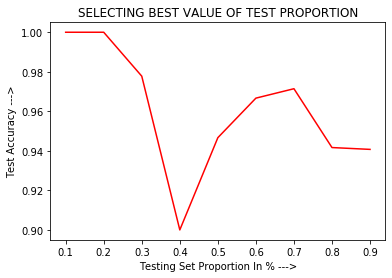

In [93]:
# TO SELECT THE BEST VALUE FOR TESTING PROPORTION
t=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
lst1=[]
for i in t:
    X_train, X_test, Y_train, Y_test = train_test_split(x, my_y, test_size=i, random_state=0)
    Y_train=Y_train.flatten()
    knn=KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train,Y_train)
    l=acc=knn.score(X_test,Y_test)
    lst1.append(l)

plt.plot(t,lst1,color='red')
plt.xlabel('Testing Set Proportion In % --->')
plt.ylabel('Test Accuracy --->')
plt.title('SELECTING BEST VALUE OF TEST PROPORTION')

In [120]:
# TO CREATE GRID
arr1=np.arange(x_train[:,0].min()-1,x_train[:,0].max()+1,0.01)
arr2=np.arange(x_train[:,1].min()-1,x_train[:,1].max()+1,0.01)
xx,yy=np.meshgrid(arr1,arr2)
print(xx.shape,yy.shape,sep='\n')
print(xx,yy,sep='\n')
print(440*780)

(440, 780)
(440, 780)
[[0.1  0.11 0.12 ... 7.87 7.88 7.89]
 [0.1  0.11 0.12 ... 7.87 7.88 7.89]
 [0.1  0.11 0.12 ... 7.87 7.88 7.89]
 ...
 [0.1  0.11 0.12 ... 7.87 7.88 7.89]
 [0.1  0.11 0.12 ... 7.87 7.88 7.89]
 [0.1  0.11 0.12 ... 7.87 7.88 7.89]]
[[-0.9  -0.9  -0.9  ... -0.9  -0.9  -0.9 ]
 [-0.89 -0.89 -0.89 ... -0.89 -0.89 -0.89]
 [-0.88 -0.88 -0.88 ... -0.88 -0.88 -0.88]
 ...
 [ 3.47  3.47  3.47 ...  3.47  3.47  3.47]
 [ 3.48  3.48  3.48 ...  3.48  3.48  3.48]
 [ 3.49  3.49  3.49 ...  3.49  3.49  3.49]]
343200


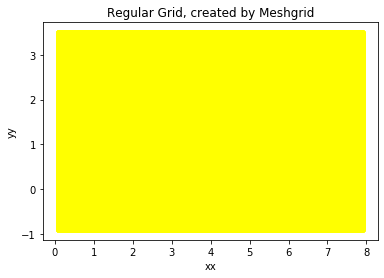

In [121]:
# TO PLOT GRID
fig, ax = plt.subplots()

ax.scatter(xx, yy, color="yellow")
ax.set_title('Regular Grid, created by Meshgrid')
ax.set_xlabel('xx')
ax.set_ylabel('yy')
plt.show()

In [122]:
# CLASSIFYING EVERY POINT ON MESH GRID
input_array=np.array([xx.ravel(),yy.ravel()]).T
labels=knn.predict(input_array)


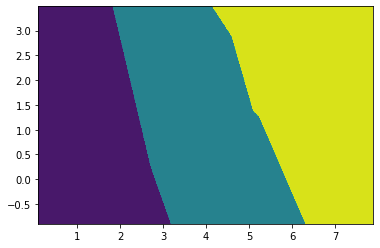

In [123]:
# PLOTING THE ARRAY AS AN IMAGE
plt.contourf(xx,yy,labels.reshape(xx.shape))

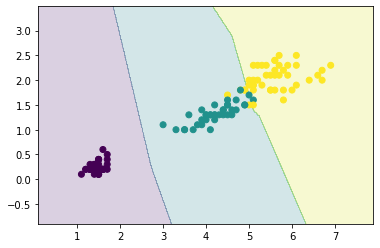

In [124]:
# PLOTING THE TRAINING DATA IN ABOVE PLOT
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.2)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)


In [127]:
# MODIFIED DATA
#data.insert(6,'species_Multi-class',my_y)
data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_Multi-class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3
